In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import geopandas
module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
from src import graphing
import src.graphing
pd.set_option('display.max_columns',None)

In [227]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [231]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [220]:
distpath ='../data/shapefiles/tanzania_districts/Districts.shx'
featurepath = "../data/training_set_values.csv"
label_path = "../data/training_set_labels.csv"
districts = geopandas.read_file(path)
features = pd.read_csv(featurepath)
label = pd.read_csv(label_path)
df = pd.merge(features,label, on = 'id')
df = df.rename(columns={'status_group':'target'})
district_nums = df.groupby('lga').count()
df_geo = pd.merge(district_nums,districts, how = 'right', left_on = 'lga', right_on='District_N')
df_geo = geopandas.GeoDataFrame(df_geo)
df.loc[df['longitude'] == 0, 'longitude'] = np.nan

In [ ]:
wells = geopandas.GeoDataFrame(df[['latitude','longitude']],
                               geometry = geopandas.points_from_xy(df.longitude, df.latitude))
wells.set_crs(epsg = 4210,inplace = True)

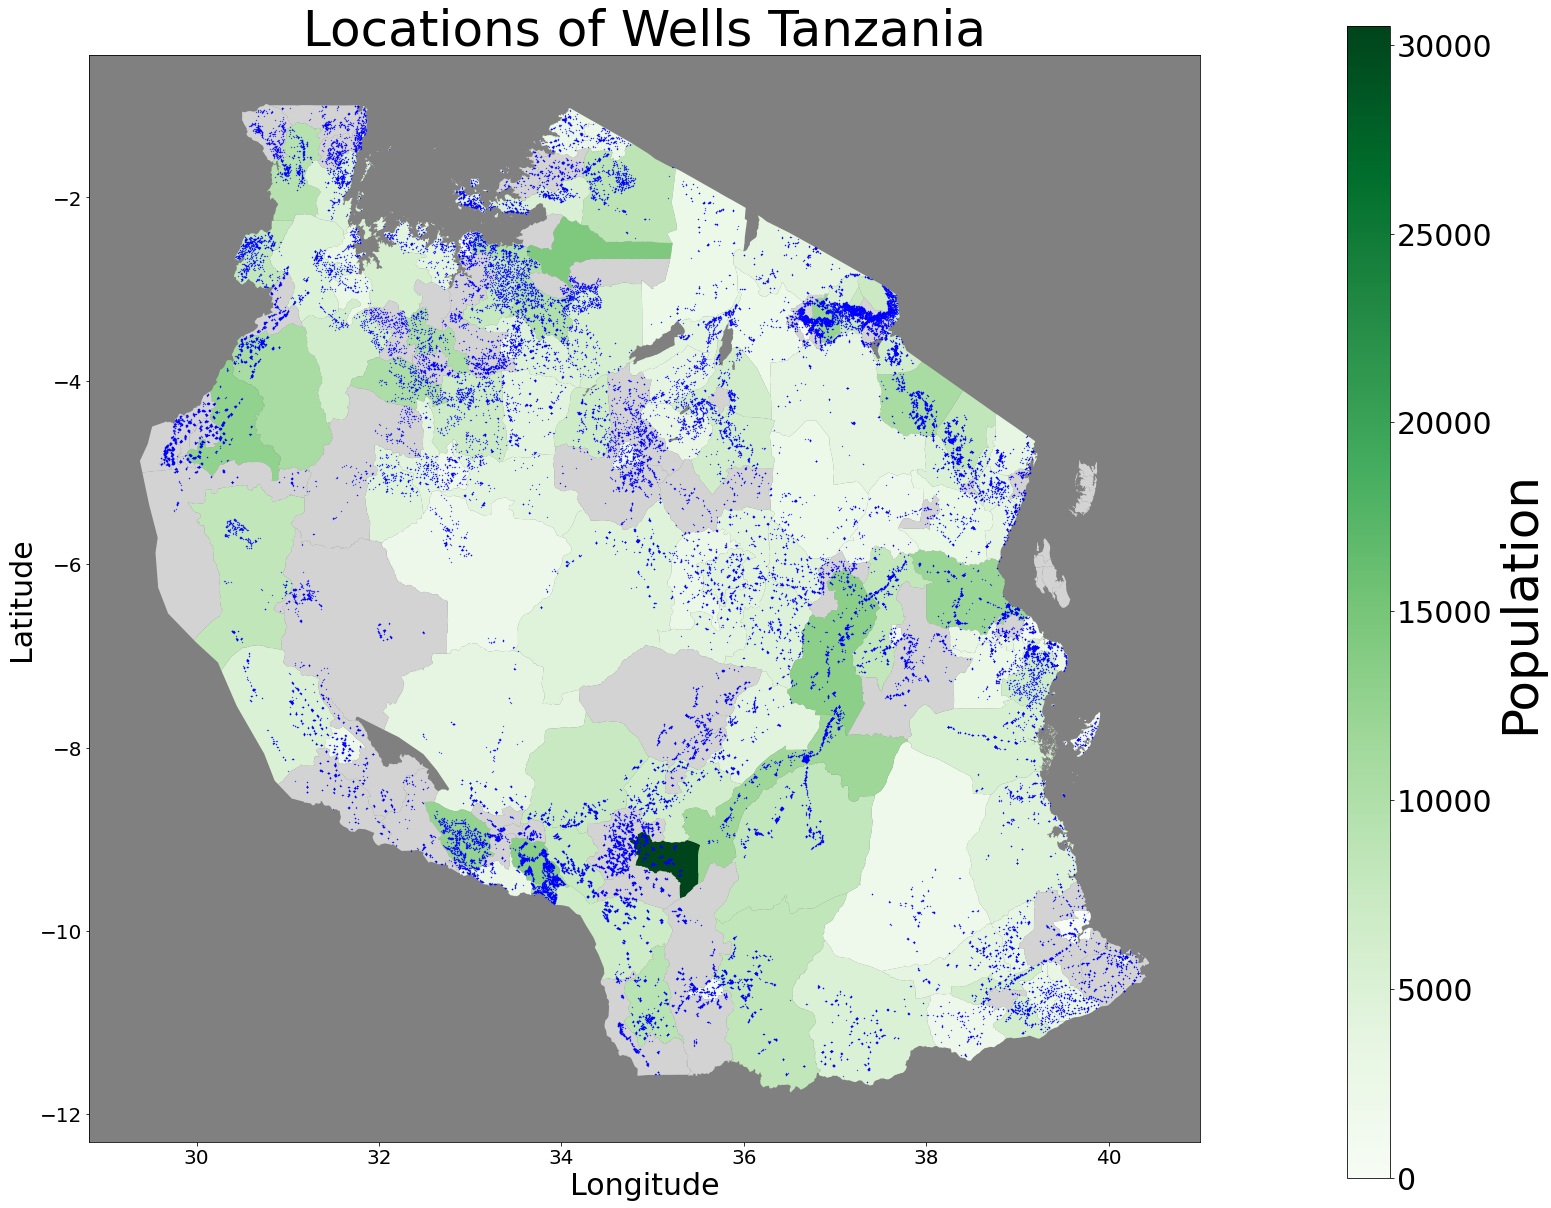

In [226]:
fig, ax = plt.subplots(figsize = (20,20))
cmap='Greens'
df_geo.plot(ax = ax,
           column = 'population',
           legend = False,
           cmap = cmap,
           figsize = (20,20),
           missing_kwds = {'color':'lightgrey'}
            
           )
ax.set_title('Locations of Wells Tanzania', fontsize = 50, y=.8)
ax.set_facecolor('grey')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
ax.set_ylabel('Latitude',  fontsize = 30)
ax.set_xlabel('Longitude', fontsize = 30)
vmin = df.population.min()
vmax = df.population.max()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbr = fig.colorbar(sm, cax=cax)
cbr.ax.tick_params(labelsize=30) 
cbr.set_label('Population', fontsize = 50)
wells.plot(ax = ax, color = 'blue', markersize = .1)
plt.savefig('figures/well_loc_and_pop_tanzania',bbox_inches = 'tight')
plt.show()